# Exploring Dandiset 001359: AIBS Patchseq Human Dataset

**Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting code or results.

## Overview

This notebook introduces Dandiset 001359, "20250331_AIBS_Patchseq_human", a multimodal dataset from the Allen Institute for Brain Science that includes patch-clamp electrophysiology recordings from human brain tissues. The dataset includes recordings that can help with multimodal classification of human cell types.

Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603

In this notebook, we will:
1. Explore the Dandiset metadata
2. Examine the file structure 
3. Load and explore an example NWB file
4. Visualize electrophysiology data (current and voltage clamp recordings)
5. Analyze spike timing data

## Required Packages

In [1]:
# Core packages for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt

# NWB and DANDI-specific packages
import h5py
import pynwb
import remfile
from dandi.dandiapi import DandiAPIClient

## Exploring Dandiset Metadata

In [2]:
# Connect to DANDI API and get information about the dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"DOI: {metadata['doi']}")
print(f"Version: {metadata['version']}")
print(f"Description: {metadata['description']}")

# Display keywords and study target
print("\nKeywords:", ", ".join(metadata['keywords']))
print("\nStudy target:", metadata['studyTarget'][0])

# Display contributors (truncated for brevity)
print("\nContributors:")
for contributor in metadata['contributor'][:3]:  # Showing first 3 contributors
    if 'name' in contributor:
        print(f"- {contributor['name']}")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
DOI: 10.48324/dandi.001359/0.250401.1603
Version: 0.250401.1603
Description: HMBA Lein PatchSeq upload (human) (Q1 2025)

Keywords: Patch-seq, human, multimodal

Study target: Multimodal classifcation of cell types in the human.

Contributors:
- Gonzalez, Limary
- Allen Institute for Brain Science
- National Institute of Mental Health


## Exploring File Structure

Let's examine the files available in this Dandiset.

In [3]:
# Get a list of assets (files) in the Dandiset
assets = list(dandiset.get_assets())
print(f"Total number of files: {len(assets)}")

# Show a subset of the files to understand the structure
print("\nSample files:")
for asset in assets[:10]:
    print(asset.path)

# Count files by subject
subjects = {}
for asset in assets:
    # Extract subject ID from path
    parts = asset.path.split('/')
    if len(parts) > 0:
        subject = parts[0]
        subjects[subject] = subjects.get(subject, 0) + 1

print("\nNumber of files per subject:")
for subject, count in list(subjects.items())[:5]:  # Show first 5 subjects
    print(f"{subject}: {count} file(s)")

print(f"Total number of subjects: {len(subjects)}")

Total number of files: 391

Sample files:
sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb
sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb
sub-1213383385/sub-1213383385_ses-1213430531_icephys.nwb
sub-1211237280/sub-1211237280_ses-1211340847_icephys.nwb
sub-1213383385/sub-1213383385_ses-1213420947_icephys.nwb
sub-1213383385/sub-1213383385_ses-1213591749_icephys.nwb
sub-1213383385/sub-1213383385_ses-1213661643_icephys.nwb

Number of files per subject:
sub-1203384279: 5 file(s)
sub-1213383385: 5 file(s)
sub-1211237280: 1 file(s)
sub-1214619242: 9 file(s)
sub-1215761491: 16 file(s)
Total number of subjects: 33


## Loading and Exploring an Example NWB File

Let's load and explore the structure of an example NWB file from this Dandiset.

In [4]:
# Specify the file to load
example_file_path = "sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb"

# Get the file's download URL
example_asset = next(dandiset.get_assets_by_glob(example_file_path))
url = example_asset.download_url

# Set up streaming access to the file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Exploring NWB File Structure

Let's examine key metadata and structure of the NWB file.

In [5]:
# Print basic file metadata
print(f"Session ID: {nwb.session_id}")
print(f"Identifier: {nwb.identifier}")
print(f"Institution: {nwb.institution}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Source: {nwb.source_script} - {nwb.source_script_file_name}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Genotype: {nwb.subject.genotype if nwb.subject.genotype else 'Not specified'}")

Session ID: 1207984257
Identifier: 27b36092e3c7a2da89f6951f82bbb47f802206ed62ab21b7d58da27e04a980a3
Institution: Allen Institute for Brain Science
Session Start Time: 2022-09-07 17:13:04.880000+00:00
Source: MIES - 2022_09_07_101311

Subject Information:
Subject ID: 1203384279
Species: Homo sapiens
Sex: M
Age: P21170.0D
Genotype: Not specified


### Examining Acquisition Data

Let's explore the acquisition data in the NWB file.

In [6]:
# List acquisition data
print("Acquisition Data Types:")
for name, data in nwb.acquisition.items():
    print(f"- {name}: {type(data).__name__}")

# Count recording types
voltage_clamp_count = 0
current_clamp_count = 0

for name, data in nwb.acquisition.items():
    if isinstance(data, pynwb.icephys.VoltageClampSeries):
        voltage_clamp_count += 1
    elif isinstance(data, pynwb.icephys.CurrentClampSeries):
        current_clamp_count += 1

print(f"\nNumber of voltage clamp recordings: {voltage_clamp_count}")
print(f"Number of current clamp recordings: {current_clamp_count}")

Acquisition Data Types:
- data_00000_AD0: VoltageClampSeries
- data_00001_AD0: VoltageClampSeries
- data_00002_AD0: VoltageClampSeries
- data_00003_AD0: VoltageClampSeries
- data_00004_AD0: VoltageClampSeries
- data_00005_AD0: VoltageClampSeries
- data_00006_AD0: CurrentClampSeries
- data_00007_AD0: CurrentClampSeries
- data_00008_AD0: CurrentClampSeries
- data_00009_AD0: CurrentClampSeries
- data_00010_AD0: CurrentClampSeries
- data_00011_AD0: CurrentClampSeries
- data_00012_AD0: CurrentClampSeries
- data_00013_AD0: CurrentClampSeries
- data_00014_AD0: CurrentClampSeries
- data_00015_AD0: CurrentClampSeries
- data_00016_AD0: CurrentClampSeries
- data_00017_AD0: CurrentClampSeries
- data_00018_AD0: CurrentClampSeries
- data_00019_AD0: CurrentClampSeries
- data_00020_AD0: CurrentClampSeries
- data_00021_AD0: CurrentClampSeries
- data_00022_AD0: CurrentClampSeries
- data_00023_AD0: CurrentClampSeries
- data_00024_AD0: CurrentClampSeries
- data_00025_AD0: CurrentClampSeries
- data_00026_A

### Examining Stimulus Data

Let's examine the stimulus data in the NWB file.

In [7]:
# List stimulus data
print("Stimulus Data Types:")
for name, data in nwb.stimulus.items():
    print(f"- {name}: {type(data).__name__}")

# Count stimulus types
voltage_stim_count = 0
current_stim_count = 0

for name, data in nwb.stimulus.items():
    if isinstance(data, pynwb.icephys.VoltageClampStimulusSeries):
        voltage_stim_count += 1
    elif isinstance(data, pynwb.icephys.CurrentClampStimulusSeries):
        current_stim_count += 1

print(f"\nNumber of voltage clamp stimuli: {voltage_stim_count}")
print(f"Number of current clamp stimuli: {current_stim_count}")

Stimulus Data Types:
- data_00000_DA0: VoltageClampStimulusSeries
- data_00001_DA0: VoltageClampStimulusSeries
- data_00002_DA0: VoltageClampStimulusSeries
- data_00003_DA0: VoltageClampStimulusSeries
- data_00004_DA0: VoltageClampStimulusSeries
- data_00005_DA0: VoltageClampStimulusSeries
- data_00006_DA0: CurrentClampStimulusSeries
- data_00007_DA0: CurrentClampStimulusSeries
- data_00008_DA0: CurrentClampStimulusSeries
- data_00009_DA0: CurrentClampStimulusSeries
- data_00010_DA0: CurrentClampStimulusSeries
- data_00011_DA0: CurrentClampStimulusSeries
- data_00012_DA0: CurrentClampStimulusSeries
- data_00013_DA0: CurrentClampStimulusSeries
- data_00014_DA0: CurrentClampStimulusSeries
- data_00015_DA0: CurrentClampStimulusSeries
- data_00016_DA0: CurrentClampStimulusSeries
- data_00017_DA0: CurrentClampStimulusSeries
- data_00018_DA0: CurrentClampStimulusSeries
- data_00019_DA0: CurrentClampStimulusSeries
- data_00020_DA0: CurrentClampStimulusSeries
- data_00021_DA0: CurrentClampStim

### Examining Processing Modules

Let's look at the processing modules in the NWB file.

In [8]:
# List processing modules
print("Processing Modules:")
for name, module in nwb.processing.items():
    print(f"- {name}: {module.description}")
    print("  Data Interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"    - {interface_name}: {type(interface).__name__}")

Processing Modules:
- spikes: detected spikes
  Data Interfaces:
    - Sweep_12: TimeSeries
    - Sweep_19: TimeSeries
    - Sweep_20: TimeSeries
    - Sweep_21: TimeSeries
    - Sweep_22: TimeSeries
    - Sweep_24: TimeSeries
    - Sweep_25: TimeSeries
    - Sweep_26: TimeSeries
    - Sweep_27: TimeSeries
    - Sweep_28: TimeSeries
    - Sweep_29: TimeSeries
    - Sweep_30: TimeSeries
    - Sweep_31: TimeSeries
    - Sweep_33: TimeSeries
    - Sweep_45: TimeSeries
    - Sweep_46: TimeSeries
    - Sweep_47: TimeSeries
    - Sweep_48: TimeSeries
    - Sweep_49: TimeSeries
    - Sweep_50: TimeSeries
    - Sweep_52: TimeSeries
    - Sweep_53: TimeSeries
    - Sweep_54: TimeSeries
    - Sweep_58: TimeSeries
    - Sweep_63: TimeSeries
    - Sweep_7: TimeSeries
    - Sweep_8: TimeSeries
    - Sweep_9: TimeSeries


## Visualizing Electrophysiology Data

Now let's visualize some of the electrophysiological recordings.

### Visualizing Voltage Clamp Data

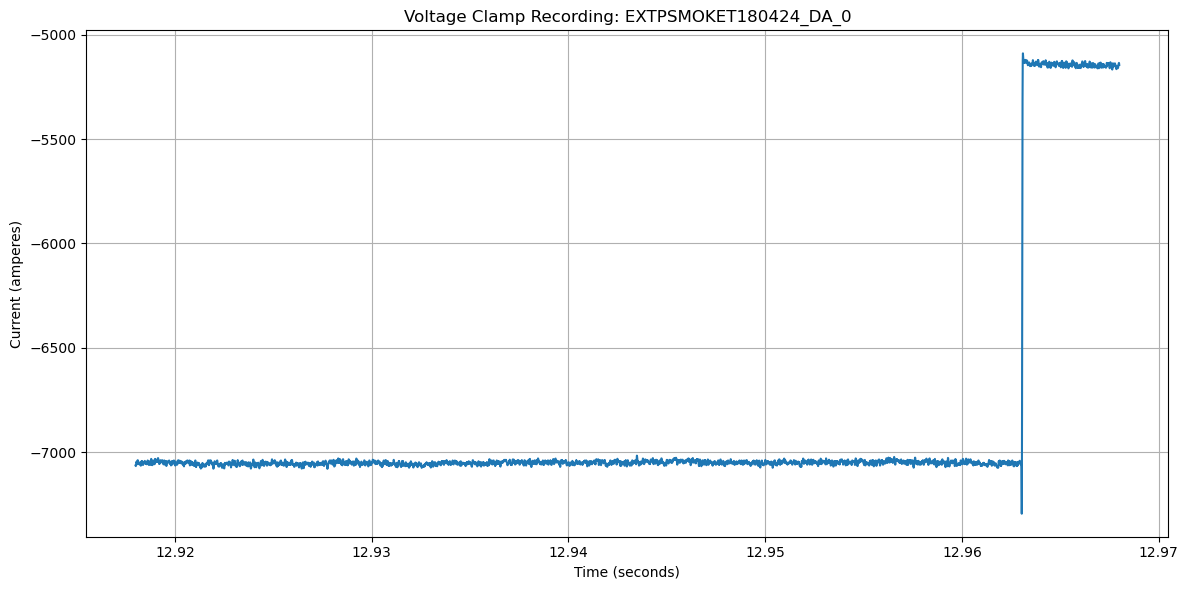

Starting time: 12.917999744415283 seconds
Sampling rate: 200000.0 Hz
Number of samples: 161000
Duration: 0.805 seconds
Stimulus description: EXTPSMOKET180424_DA_0
Comments: HS#0:Fast compensation capacitance: 0.00 F
HS#0:Slow compensation capacitance: 0.00 F
HS#0:Fast compensation time: 0.00 s
HS#0:Slow compensation time: 0.00 s
HS#0:Headstage Active: On
HS#1:Headstage A...


In [9]:
# Access a voltage clamp recording
voltage_clamp_data = nwb.acquisition["data_00000_AD0"]

# Get a subset of the data to plot
sample_size = 10000  # Use a smaller sample size for plotting
sample_data = np.array(voltage_clamp_data.data[0:sample_size])  # Convert to numpy array

# Calculate time array based on rate and starting time
sample_time = voltage_clamp_data.starting_time + np.arange(sample_size) / voltage_clamp_data.rate

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(sample_time, sample_data)
plt.xlabel("Time (seconds)")
plt.ylabel(f"Current ({voltage_clamp_data.unit})")
plt.title(f"Voltage Clamp Recording: {voltage_clamp_data.stimulus_description}")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some metadata about this recording
print(f"Starting time: {voltage_clamp_data.starting_time} {voltage_clamp_data.starting_time_unit}")
print(f"Sampling rate: {voltage_clamp_data.rate} Hz")
print(f"Number of samples: {len(voltage_clamp_data.data)}")
print(f"Duration: {len(voltage_clamp_data.data) / voltage_clamp_data.rate} seconds")
print(f"Stimulus description: {voltage_clamp_data.stimulus_description}")
print(f"Comments: {voltage_clamp_data.comments[:200]}...")  # Truncate long comments

### Visualizing the Corresponding Voltage Clamp Stimulus

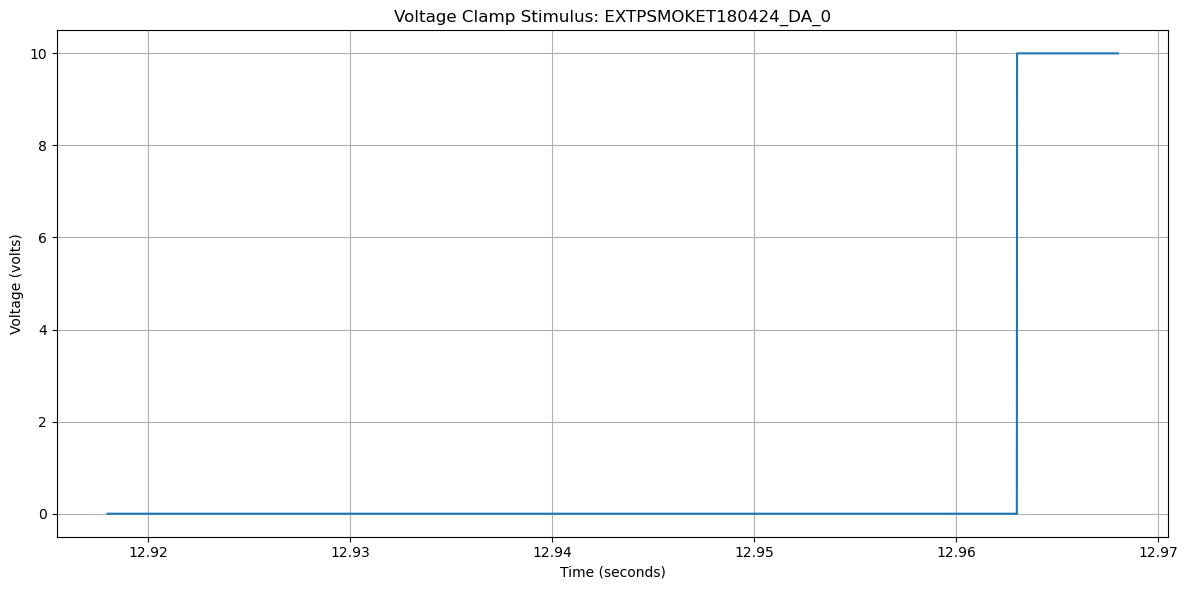

In [10]:
# Get the corresponding stimulus
voltage_clamp_stim = nwb.stimulus["data_00000_DA0"]

# Get a subset of the data to plot
stim_sample_data = np.array(voltage_clamp_stim.data[0:sample_size])  # Convert to numpy array
stim_sample_time = voltage_clamp_stim.starting_time + np.arange(sample_size) / voltage_clamp_stim.rate

# Plot the stimulus
plt.figure(figsize=(12, 6))
plt.plot(stim_sample_time, stim_sample_data)
plt.xlabel("Time (seconds)")
plt.ylabel(f"Voltage ({voltage_clamp_stim.unit})")
plt.title(f"Voltage Clamp Stimulus: {voltage_clamp_stim.stimulus_description}")
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizing Current Clamp Data

Now let's look at a current clamp recording.

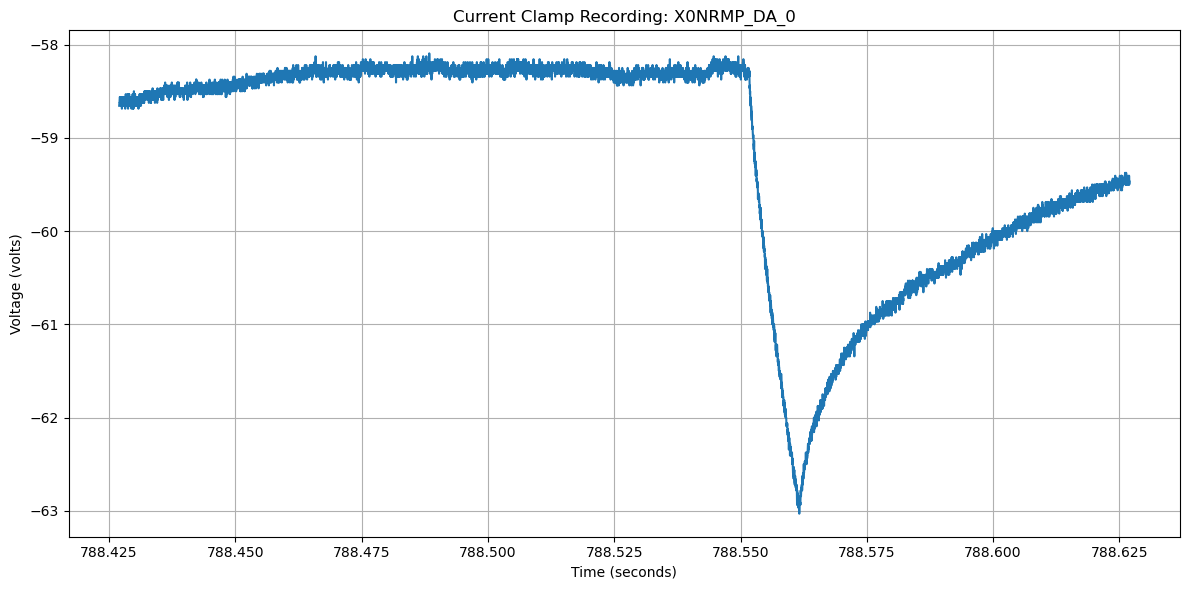

Starting time: 788.4270000457764 seconds
Sampling rate: 50000.0 Hz
Number of samples: 312953
Duration: 6.25906 seconds
Stimulus description: X0NRMP_DA_0


In [11]:
# Access a current clamp recording (one of the first ones)
current_clamp_key = None
for key, data in nwb.acquisition.items():
    if isinstance(data, pynwb.icephys.CurrentClampSeries):
        current_clamp_key = key
        break

if current_clamp_key:
    current_clamp_data = nwb.acquisition[current_clamp_key]
    
    # Get a sample of the data
    cc_sample_size = min(10000, len(current_clamp_data.data))
    cc_sample_data = np.array(current_clamp_data.data[0:cc_sample_size])
    cc_time_array = current_clamp_data.starting_time + np.arange(cc_sample_size) / current_clamp_data.rate
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(cc_time_array, cc_sample_data)
    plt.xlabel("Time (seconds)")
    plt.ylabel(f"Voltage ({current_clamp_data.unit})")
    plt.title(f"Current Clamp Recording: {current_clamp_data.stimulus_description}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print some metadata about this recording
    print(f"Starting time: {current_clamp_data.starting_time} {current_clamp_data.starting_time_unit}")
    print(f"Sampling rate: {current_clamp_data.rate} Hz")
    print(f"Number of samples: {len(current_clamp_data.data)}")
    print(f"Duration: {len(current_clamp_data.data) / current_clamp_data.rate} seconds")
    print(f"Stimulus description: {current_clamp_data.stimulus_description}")
else:
    print("No CurrentClampSeries found in acquisition.")

### Visualizing Detected Spikes

Let's look at the spikes detected in the recordings.

Sweeps with spikes: ['Sweep_19', 'Sweep_24', 'Sweep_25', 'Sweep_26', 'Sweep_27', 'Sweep_28', 'Sweep_29', 'Sweep_30', 'Sweep_31', 'Sweep_33', 'Sweep_45', 'Sweep_47', 'Sweep_48', 'Sweep_50']


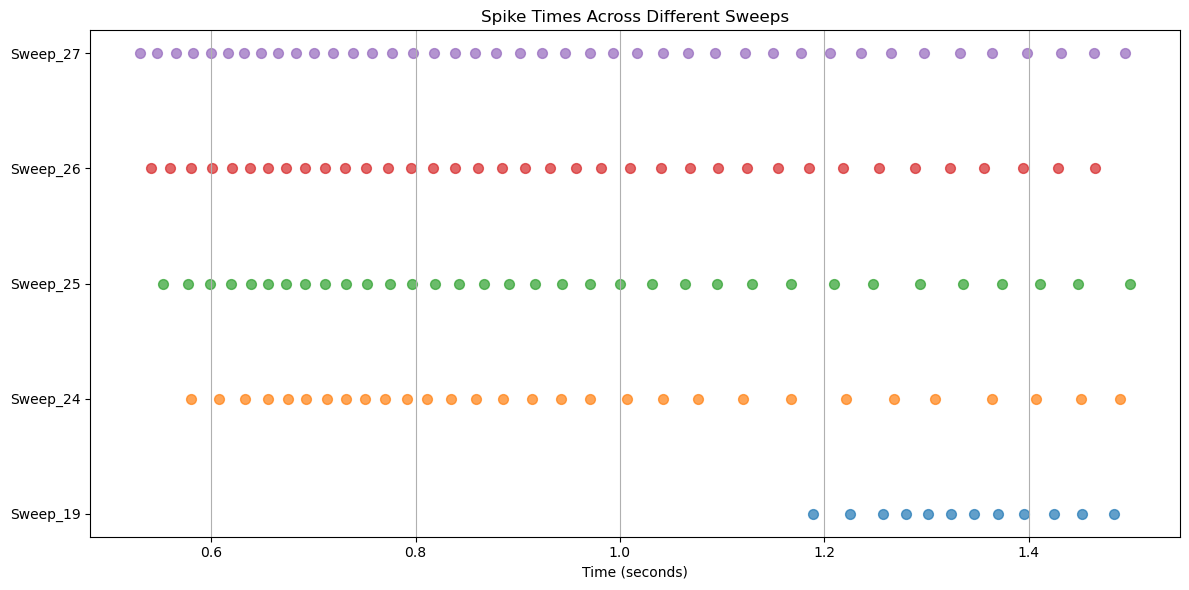

In [12]:
# Access the spikes processing module
spikes_module = nwb.processing["spikes"]

# Plot spike times for a few sweeps that have spikes
plt.figure(figsize=(12, 6))

# Find sweeps with spikes
sweeps_with_spikes = []
for interface_name, interface in spikes_module.data_interfaces.items():
    # Check if the interface has data (timestamps with length > 0)
    if len(interface.timestamps) > 0:
        sweeps_with_spikes.append(interface_name)

print(f"Sweeps with spikes: {sweeps_with_spikes}")

# Plot spike times for sweeps with spikes (up to 5)
for i, sweep_name in enumerate(sweeps_with_spikes[:5]):
    interface = spikes_module.data_interfaces[sweep_name]
    timestamps = np.array(interface.timestamps)  # Convert to numpy array
    plt.scatter(timestamps, [i] * len(timestamps), label=sweep_name, s=50, alpha=0.7)

if sweeps_with_spikes:
    plt.yticks(range(len(sweeps_with_spikes[:5])), sweeps_with_spikes[:5])
    plt.xlabel("Time (seconds)")
    plt.title("Spike Times Across Different Sweeps")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("No sweeps with spikes found.")

### Examining a Current Clamp Recording with a Step Stimulus

Let's look more closely at a current clamp recording paired with its stimulus to see the cellular response.

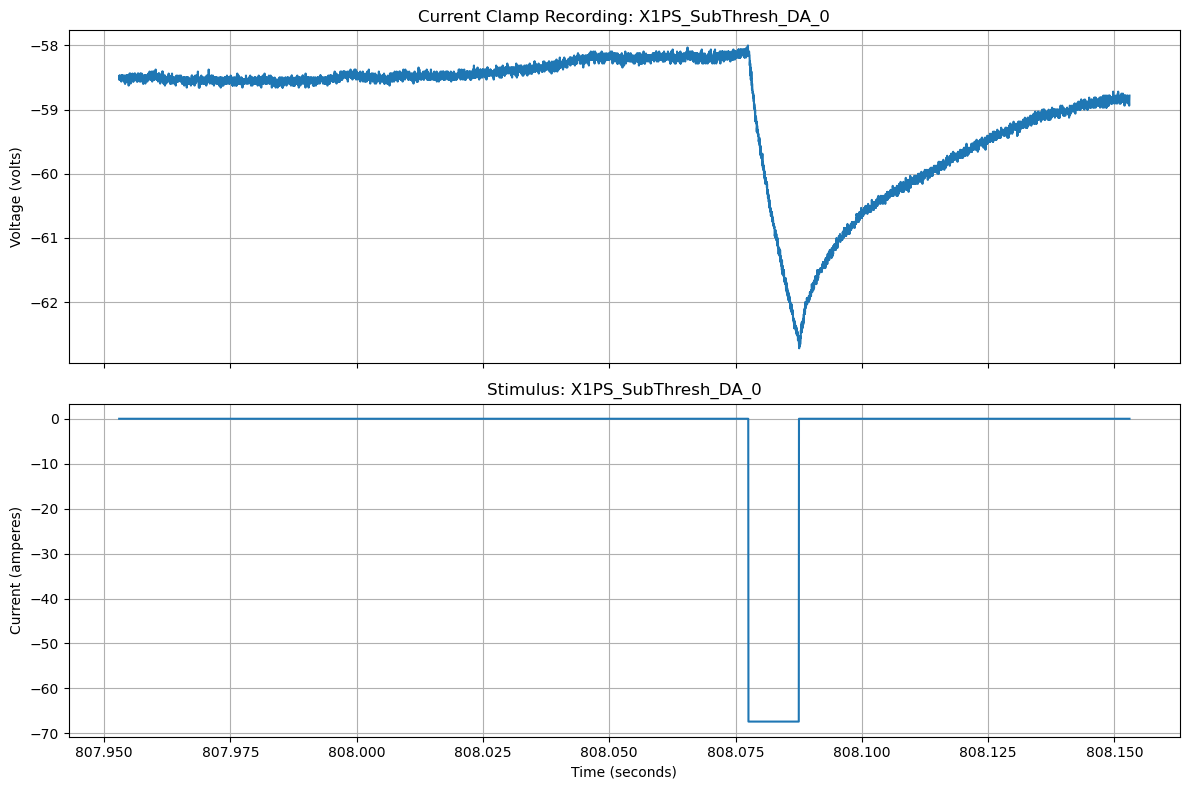

Stimulus description: X1PS_SubThresh_DA_0
Starting time: 807.9530000686646 seconds
Duration: 3.75906 seconds


In [13]:
# Find a good current clamp example with its stimulus (specifically for X1PS_SubThresh)
current_clamp_data = nwb.acquisition.get("data_00007_AD0")
current_clamp_stim = nwb.stimulus.get("data_00007_DA0")

if current_clamp_data and current_clamp_stim:
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Use a sample of the data to avoid memory issues
    sample_size = min(10000, len(current_clamp_data.data), len(current_clamp_stim.data))
    
    # Convert to numpy arrays
    cc_data_sample = np.array(current_clamp_data.data[0:sample_size])
    cc_stim_sample = np.array(current_clamp_stim.data[0:sample_size])
    
    # Calculate time array
    time_array = current_clamp_data.starting_time + np.arange(sample_size) / current_clamp_data.rate
    
    # Plot current clamp recording (voltage)
    ax1.plot(time_array, cc_data_sample)
    ax1.set_ylabel(f"Voltage ({current_clamp_data.unit})")
    ax1.set_title(f"Current Clamp Recording: {current_clamp_data.stimulus_description}")
    ax1.grid(True)
    
    # Plot stimulus (current)
    ax2.plot(time_array, cc_stim_sample)
    ax2.set_xlabel("Time (seconds)")
    ax2.set_ylabel(f"Current ({current_clamp_stim.unit})")
    ax2.set_title(f"Stimulus: {current_clamp_stim.stimulus_description}")
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print metadata
    print(f"Stimulus description: {current_clamp_stim.stimulus_description}")
    print(f"Starting time: {current_clamp_data.starting_time} {current_clamp_data.starting_time_unit}")
    print(f"Duration: {len(current_clamp_data.data) / current_clamp_data.rate} seconds")
else:
    print("Couldn't find matching current clamp recording and stimulus.")

### Examining a Full Sweep Table

The NWB file contains a sweep table that groups different PatchClampSeries together.

In [14]:
# Convert sweep table to a pandas DataFrame for easier inspection
sweep_df = nwb.sweep_table.to_dataframe()

print(f"Total number of sweeps: {len(sweep_df)}")
print("\nFirst few sweeps:")
print(sweep_df.head())

# Count sweeps by series type
series_counts = {}
for i in range(len(sweep_df)):
    series_list = sweep_df.iloc[i]['series']
    for series_obj in series_list:
        series_type = type(series_obj).__name__
        series_counts[series_type] = series_counts.get(series_type, 0) + 1

print("\nSeries types in sweep table:")
for series_type, count in series_counts.items():
    print(f"{series_type}: {count}")

Total number of sweeps: 132

First few sweeps:
                                               series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2

Series types in sweep table:
VoltageClampSeries: 7
VoltageClampStimulusSeries: 7
CurrentClampSeries: 59
CurrentClampStimulusSeries: 59


## Summary and Future Exploration

In this notebook, we've explored the AIBS Patchseq human dataset, focusing on:

- The overall structure and metadata of the Dandiset
- The contents and structure of an example NWB file
- Visualization of different electrophysiological recordings (voltage and current clamp)
- Examining spike timing data from the processing module

For future exploration, researchers might:
- Compare electrophysiological properties across different cell types
- Analyze spike frequency and patterns in different recordings
- Examine data from multiple subjects to identify cell type-specific properties
- Integrate this data with other modalities for comprehensive cell type classification